# SeatGeek rankings

In this python notebook, I explore the question "What is the state that has best venue scores on average?"
We can answer this question with relative ease thanks to SeatGeek public API. We can get the venues information by running the following api request:

```
http://api.seatgeek.com/2/venues
```

We can know how many venues are registered in SeatGeek public api by examining the meta data that comes in the response of the previous request. A simple way for loading the response into a nice JSON using python is:

In [79]:
import urllib2
import json
import pandas as pd
import numpy as np

response = urllib2.urlopen('http://api.seatgeek.com/2/venues?per_page=5000&page=1')
data = json.load(response)
data = pd.io.json.json_normalize(data)
total_results = data['meta.total'][0]
results_per_page = data['meta.per_page']
total_pages = total_results/int(results_per_page) + 1
print total_results
print total_pages

61670
13


In [85]:
venues = []
for i in range(1,total_pages):
    response = urllib2.urlopen('http://api.seatgeek.com/2/venues?per_page=5000&page='+str(i))
    data = json.load(response)
    data = pd.io.json.json_normalize(data)
    venues.append(pd.io.json.json_normalize(data['venues'][0]))

So we can now see how many venues are registered in SeatGeek public api. Now, we want to group all the venue scores by state. This can be done using pandas. First, we need  a dictionary to hold the statistics for each state. We do this by defining a dictionary as follows:

In [123]:
venue_states = {u'AK':[],u'AL':[],u'AZ':[],u'AR':[],u'CA':[],u'CO':[],u'CT':[],u'DE':[],u'FL':[],u'GA':[],u'HI':[],u'ID':[],u'IL':[],
u'IN':[],u'IA':[],u'KS':[],u'KY':[],u'LA':[],u'ME':[],u'MD':[],u'MA':[],u'MI':[],u'MN':[],u'MS':[],u'MO':[],u'MT':[],u'NE':[],u'NV':[],
u'NH':[],u'NJ':[],u'NM':[],u'NY':[],u'NC':[],u'ND':[],u'OH':[],u'OK':[],u'OR':[],u'PA':[],u'RI':[],u'SC':[],u'SD':[],u'TN':[],u'TX':[],u'UT':[],
u'VT':[],u'VA':[],u'WA':[],u'WV':[],u'WI':[],u'WY':[]}

venue_state_scores = {u'AK':0,u'AL':0,u'AZ':0,u'AR':0,u'CA':0,u'CO':0,u'CT':0,u'DE':0,u'FL':0,u'GA':0,u'HI':0,u'ID':0,u'IL':0,
u'IN':0,u'IA':0,u'KS':0,u'KY':0,u'LA':0,u'ME':0,u'MD':0,u'MA':0,u'MI':0,u'MN':0,u'MS':0,u'MO':0,u'MT':0,u'NE':0,u'NV':0,
u'NH':0,u'NJ':0,u'NM':0,u'NY':0,u'NC':0,u'ND':0,u'OH':0,u'OK':0,u'OR':0,u'PA':0,u'RI':0,u'SC':0,u'SD':0,u'TN':0,u'TX':0,u'UT':0,
u'VT':0,u'VA':0,u'WA':0,u'WV':0,u'WI':0,u'WY':0}

Now, we can group by ```country``` and ```state``` and add the corresponding scores to our dictionary ```venue_states```

In [124]:
for venue in venues:
    for state in venue.groupby('state').groups.keys():
        if state in venue_states:
            venue_states[state] += venue.groupby('state').groups[state]
            
    for state in venue_states:
        scores = []
        for elem in venue_states[state]:
            if venue['score'][elem] > 0: #only consider scored venues
                scores.append(venue['score'][elem])
        
        if len(scores) > 0:
            venue_state_scores[state] = (venue_state_scores[state]+np.average(scores))/2.0
        else:
            venue_state_scores[state] += 0.0


Now, we can find the scores for each venue by using the list of ids we have for every ```state -> id``` mapping we have encoded in our ```venue_states``` dictionary. We have our desired results in ```venue_state_scores```. We attempt to visualize this data using histograms. We will only show the top 10 states to not clutter the histogram.

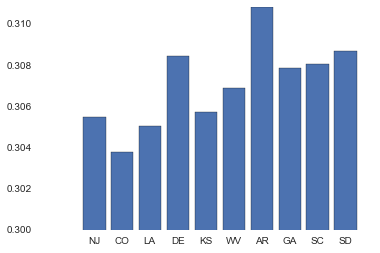

In [132]:
%matplotlib inline

import operator
import matplotlib.pyplot as plt
import seaborn as sns


sorted_state_scores = sorted(venue_state_scores.items(), key=operator.itemgetter(1))
top_ten = sorted_state_scores[-10:][::-1]

top_ten = dict(top_ten)
plt.bar(np.arange(len(top_ten)), top_ten.values(), align='center')
plt.xticks(np.arange(len(top_ten)), top_ten.keys())
ymax = max(top_ten.values())
plt.ylim(0.3, ymax)
plt.show()

In [130]:
for i in  sorted_state_scores[::-1]:
    print i

(u'AR', 0.31086305555555555)
(u'SD', 0.30869216911764708)
(u'DE', 0.30845291666666663)
(u'SC', 0.30808363919413922)
(u'GA', 0.30788960407838983)
(u'WV', 0.30689457532051279)
(u'KS', 0.30570935416666667)
(u'NJ', 0.30546709675563732)
(u'LA', 0.30503908986175116)
(u'CO', 0.30378729279891303)
(u'MS', 0.30374429100790512)
(u'AK', 0.30350093749999996)
(u'FL', 0.30310335726950355)
(u'MD', 0.3030188773344652)
(u'AZ', 0.30270352901870945)
(u'AL', 0.30233959263015553)
(u'KY', 0.30213550555555557)
(u'NV', 0.30202096424616359)
(u'MI', 0.3019886048593351)
(u'OH', 0.30168639142049025)
(u'NC', 0.30165515816326527)
(u'WI', 0.30164775365529461)
(u'WA', 0.30132636157984838)
(u'UT', 0.30101807142857145)
(u'IL', 0.30086491071428573)
(u'TX', 0.30063689967975499)
(u'MN', 0.29991293650793649)
(u'NY', 0.29953172147723878)
(u'TN', 0.29940913731963809)
(u'CT', 0.29933459448160538)
(u'IN', 0.29932012820512821)
(u'CA', 0.29909556886139566)
(u'WY', 0.29798279761904756)
(u'ID', 0.29631737499999999)
(u'HI', 0.296190